In [2]:
# Import needed packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



% matplotlib inline
from IPython.display import display # Allows the use of display() for DataFrames
pd.options.display.max_columns = 500 # To avoid truncated outputs
pd.options.display.max_rows = 50 # To avoid truncated outputs

In [3]:
# load dataset
df = pd.read_csv('iris.csv')

In [4]:
# take a look at the dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# shape
df.shape

(150, 5)

In [6]:
# Dataset discription
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Class distribution
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

## Univariate Plots

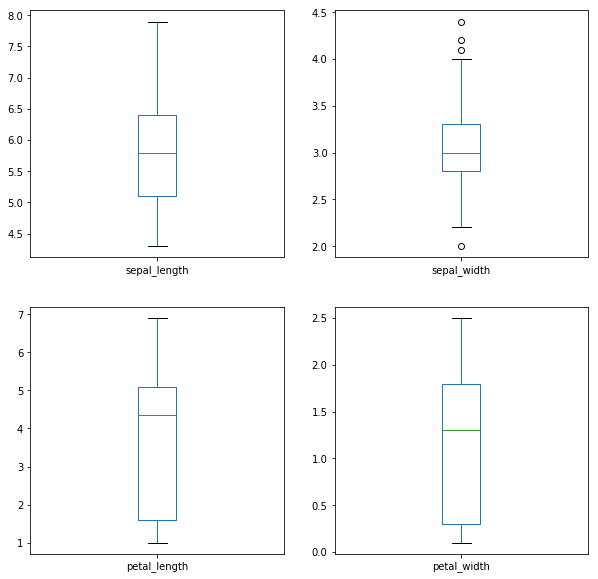

In [8]:
# box and whisker plots
df.plot(kind='box',subplots=True, layout=(2,2),sharex=False, sharey=False, figsize=(10,10));

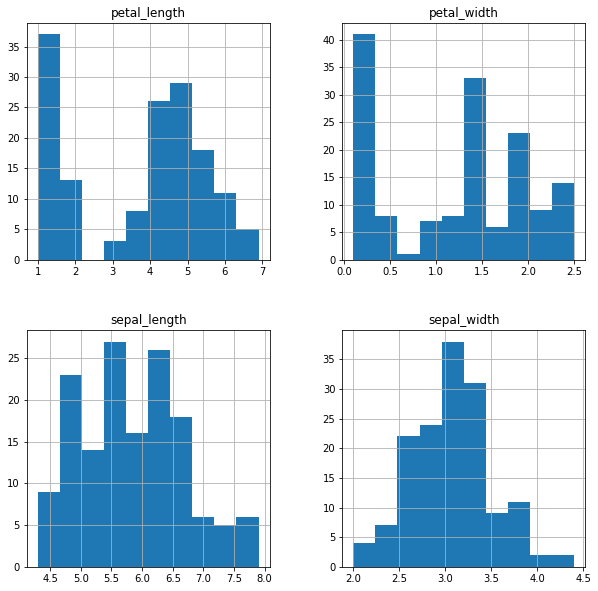

In [9]:
# histograms
df.hist(figsize=(10,10));

## Multivariate plots

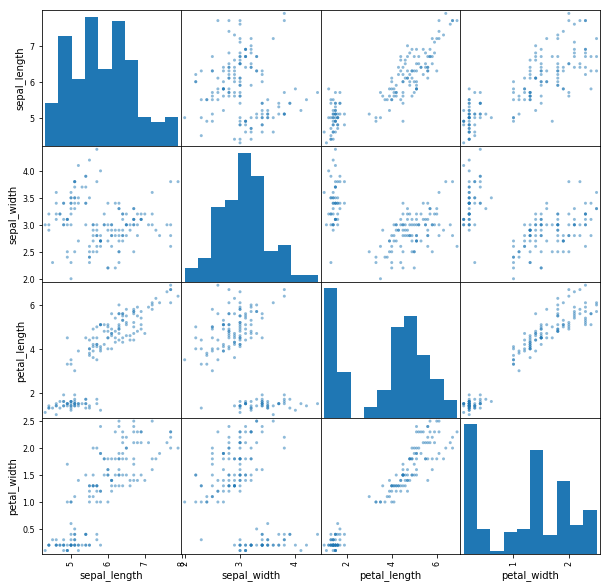

In [10]:
# Scatter plot matrix
scatter_matrix(df,figsize=(10,10));

## Evaluate Algorithms

In [11]:
# Split- out validation dataset
array = df.values
X = array[:,0:4]
y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X,y,test_size=validation_size, random_state=seed)


In [12]:
# Test Options and Evaluation Matrix
seed=7
scoring = 'accuracy'

In [23]:
# Spot Check algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.983333 (0.033333)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


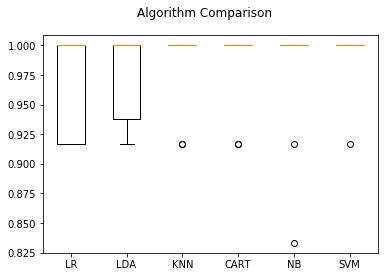

In [24]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

In [25]:
# make prediction on validation set
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.85      0.92      0.88        12
   virginica       0.90      0.82      0.86        11

   micro avg       0.90      0.90      0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



In [26]:
# Make prediction on validation set using SVM
svm = SVC(gamma='auto')
svm.fit(X_train,Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       1.00      0.83      0.91        12
   virginica       0.85      1.00      0.92        11

   micro avg       0.93      0.93      0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

